In this notbook, I compare the estimates of apparent proper motion of radio sources from two algorithms:
    
    - fit the proper motion in the R.A. and decl.;
    
    - fit the total proper motion.

I also compare the results of different limit used to remove the outliers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table

In [2]:
apm_tab = Table.read("../logs/ts_pm_fit_4_test.dat", format="ascii")

Calculate the total proper motion from $\mu_{\alpha*}$ and $\mu_{\delta}$.

In [3]:
pm_ra, pmra_err = apm_tab["pm_ra"], apm_tab["pmra_err"]
pm_dec, pmdec_err = apm_tab["pm_dec"], apm_tab["pmdec_err"]

# Total proper motion
pm2 = pm_ra**2 + pm_dec**2
pm = np.sqrt(pm2)
pm_err = np.sqrt(pm_ra**2 * pmra_err**2 + 
                 pm_dec**2 * pmdec_err**2) / pm

Calculate the orientation of the proper motion vector from $\mu_{\alpha*}$ and $\mu_{\delta}$.

In [4]:
cen = SkyCoord(0*u.deg, 0*u.deg, frame="icrs")
oft = SkyCoord(pm_ra*u.deg, pm_dec*u.deg, frame="icrs")

pa = cen.position_angle(oft)
pa_deg = pa.to(u.deg).value

# Formal error
pa_err = np.sqrt(pm_dec**2 * pmra_err**2 + 
                 pm_ra**2 * pmdec_err**2) / pm2
pa_err_deg = np.rad2deg(pa_err)

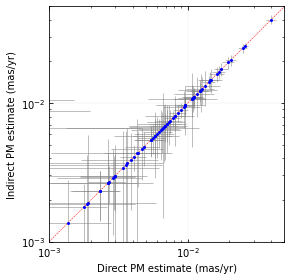

In [5]:
fig, ax = plt.subplots()

ax.errorbar(apm_tab["pm"], pm, xerr=apm_tab["pm_err"], yerr=pm_err, fmt="bo", elinewidth=0.5, ms=2, ecolor="grey")
x = np.arange(0, 1, 0.1)
ax.plot(x, x, "r--", lw=0.5)

ax.axis("square")
ax.axis([0.001, 0.05, 0.001, 0.05])

ax.set_xscale("log")
ax.set_yscale("log")

ax.grid()

ax.set_xlabel("Direct PM estimate (mas/yr)")
ax.set_ylabel("Indirect PM estimate (mas/yr)")
plt.tight_layout()

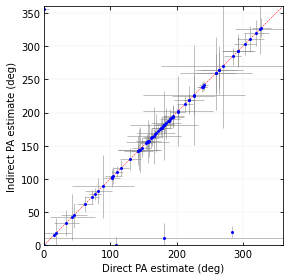

In [6]:
fig, ax = plt.subplots()

ax.errorbar(apm_tab["pa"], pa_deg, xerr=apm_tab["pa_err"], yerr=pa_err_deg, 
            fmt="bo",
            elinewidth=0.5,
            ms=2,
            ecolor="grey")

x = np.arange(0, 360, 1)
ax.plot(x, x, "r--", lw=0.5)

ax.axis("square")
ax.axis([0, 360, 0, 360])

ax.set_xlabel("Direct PA estimate (deg)")
ax.set_ylabel("Indirect PA estimate (deg)")
ax.grid()
plt.tight_layout()

In the end, I found no significant difference.

When we use $N$-sigma principle to remove the outliers, the fitted value of proper motion may varies.

I try N = 1, 3, 5, 10, infinite (that is, no outliers).

In [7]:
apm_tab = Table.read("../logs/ts_pm_fit.dat", format="ascii.csv")
apm_tab1 = Table.read("../logs/ts_pm_fit_1sigma.dat", format="ascii.csv")
apm_tab3 = Table.read("../logs/ts_pm_fit_3sigma.dat", format="ascii.csv")
apm_tab5 = Table.read("../logs/ts_pm_fit_5sigma.dat", format="ascii.csv")
apm_tab10 = Table.read("../logs/ts_pm_fit_10sigma.dat", format="ascii.csv")

From top to bottom
1-sigma
3-sigma
5-sigma
10-sigma
No outlier


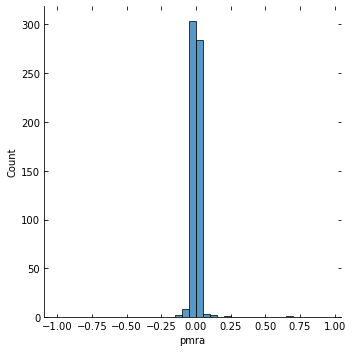

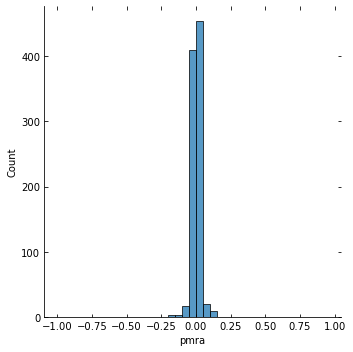

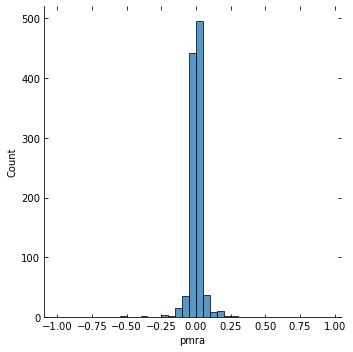

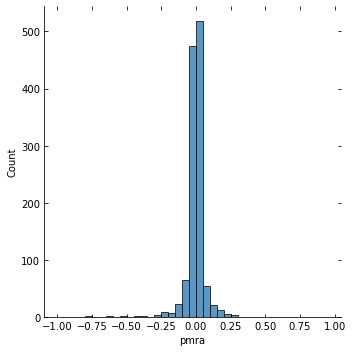

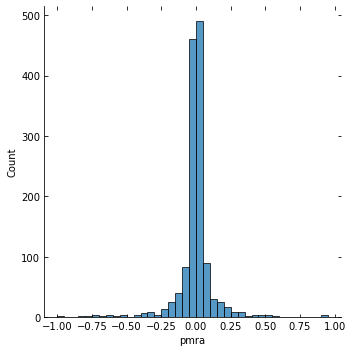

In [13]:
print("From top to bottom")
print("1-sigma")
print("3-sigma")
print("5-sigma")
print("10-sigma")
print("No outlier")

sns.displot(x=apm_tab1["pmra"], bins=np.arange(-1, 1, 0.05))
sns.displot(x=apm_tab3["pmra"], bins=np.arange(-1, 1, 0.05))
sns.displot(x=apm_tab5["pmra"], bins=np.arange(-1, 1, 0.05))
sns.displot(x=apm_tab10["pmra"], bins=np.arange(-1, 1, 0.05))
sns.displot(x=apm_tab["pmra"], bins=np.arange(-1, 1, 0.05))

From top to bottom
1-sigma
3-sigma
5-sigma
10-sigma
No outlier


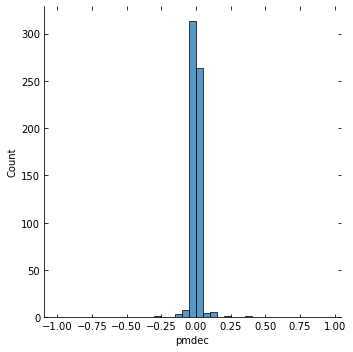

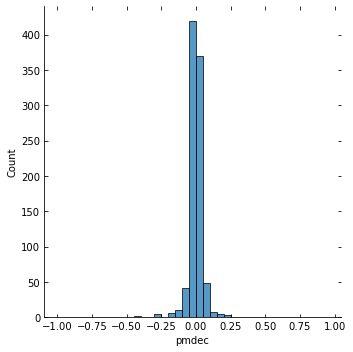

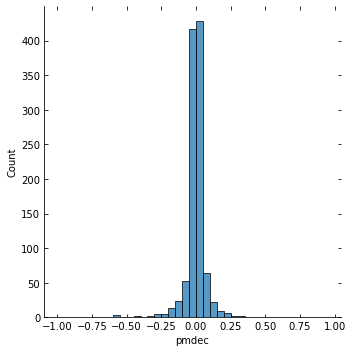

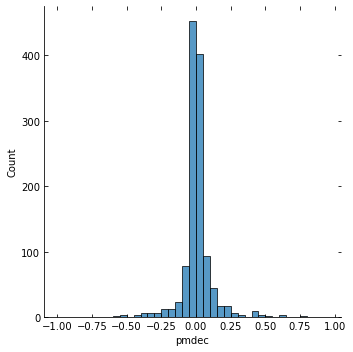

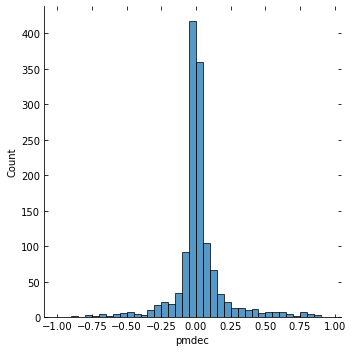

In [15]:
print("From top to bottom")
print("1-sigma")
print("3-sigma")
print("5-sigma")
print("10-sigma")
print("No outlier")

sns.displot(x=apm_tab1["pmdec"], bins=np.arange(-1, 1, 0.05))
sns.displot(x=apm_tab3["pmdec"], bins=np.arange(-1, 1, 0.05))
sns.displot(x=apm_tab5["pmdec"], bins=np.arange(-1, 1, 0.05))
sns.displot(x=apm_tab10["pmdec"], bins=np.arange(-1, 1, 0.05))
sns.displot(x=apm_tab["pmdec"], bins=np.arange(-1, 1, 0.05))